<a href="https://colab.research.google.com/github/ehpub/ML-with-Python/blob/main/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_with_python_011_Binarizer%EB%A1%9C_recall%EA%B3%BC_precision_%EC%A1%B0%EC%A0%88%ED%95%98%EA%B8%B0_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[설명](https://ehpub.co.kr/binarizer%eb%a1%9c-recall%ea%b3%bc-precision-%ec%a1%b0%ec%a0%88%ed%95%98%ea%b8%b0-%eb%a8%b8%ec%8b%a0%eb%9f%ac%eb%8b%9d-with-python/)

- 사용할 모듈 포함문

In [34]:
from sklearn.preprocessing import Binarizer #이항 변수화 변환
from sklearn.metrics import recall_score #리콜(재현율, 민감도)
from sklearn.metrics import precision_score #정밀도

from sklearn.metrics import confusion_matrix #혼동 행렬
from sklearn.metrics import accuracy_score #적합도
from sklearn.metrics import f1_score #F1 점수

from sklearn.datasets import load_breast_cancer #유방암 데이터
from sklearn.linear_model import LogisticRegression #로지스틱 회귀
from sklearn.model_selection import train_test_split #학습 및 테스트 데이터 분리
from sklearn.preprocessing import MinMaxScaler

import numpy as np
import matplotlib.pyplot as plt

## 유방암 데이터 분류 작업 (이진 분류)

In [8]:
cancer = load_breast_cancer()
data = cancer.data
target = cancer.target
x_train_org,x_test, y_train_org,y_test = train_test_split(data[:30000],target[:30000])
x_train,x_val, y_train,y_val = train_test_split(x_train_org,y_train_org)
print(y_train.shape, y_val.shape, y_test.shape)

(319,) (107,) (143,)


In [10]:
mms = MinMaxScaler()
mms.fit(data)
x_train_s = mms.transform(x_train)
x_val_s = mms.transform(x_val)
x_test_s = mms.transform(x_test)

In [12]:
model = LogisticRegression() #로지스틱 회귀
print(model.__class__.__name__,"###")
model.fit(x_train_s,y_train)
pred_train = model.predict(x_train_s)
print("학습 데이터")
print(confusion_matrix(y_train,pred_train))
print(f"\t적합도:{accuracy_score(y_train,pred_train):.2f}")
print(f"\t리콜:{recall_score(y_train,pred_train):.2f}")
print(f"\t정밀도:{precision_score(y_train,pred_train):.2f}")

pred_val = model.predict(x_val_s)
print("검증 데이터")
print(confusion_matrix(y_val,pred_val))
print(f"\t적합도:{accuracy_score(y_val,pred_val):.2f}")
print(f"\t리콜:{recall_score(y_val,pred_val):.2f}")
print(f"\t정밀도:{precision_score(y_val,pred_val):.2f}")

pred_test = model.predict(x_test_s)
print("평가 데이터")
print(confusion_matrix(y_test,pred_test))
print(f"\t적합도:{accuracy_score(y_test,pred_test):.2f}")
print(f"\t리콜:{recall_score(y_test,pred_test):.2f}")
print(f"\t정밀도:{precision_score(y_test,pred_test):.2f}")

LogisticRegression ###
학습 데이터
[[117   9]
 [  1 192]]
	적합도:0.97
	리콜:0.99
	정밀도:0.96
검증 데이터
[[34  2]
 [ 0 71]]
	적합도:0.98
	리콜:1.00
	정밀도:0.97
평가 데이터
[[47  3]
 [ 0 93]]
	적합도:0.98
	리콜:1.00
	정밀도:0.97


## Binarizer

In [25]:
dum_data = [ [round(value,1)] for value in np.arange(0.1,1.0,0.1)]
print("data:",dum_data)
for th_value in [0.1, 0.3, 0.5, 0.7, 0.9]:
  binarizer = Binarizer(threshold=th_value)
  print(th_value,end=' : ')
  result = binarizer.transform(dum_data)
  print(result.tolist())

data: [[0.1], [0.2], [0.3], [0.4], [0.5], [0.6], [0.7], [0.8], [0.9]]
0.1 : [[0.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0]]
0.3 : [[0.0], [0.0], [0.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0]]
0.5 : [[0.0], [0.0], [0.0], [0.0], [0.0], [1.0], [1.0], [1.0], [1.0]]
0.7 : [[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [1.0], [1.0]]
0.9 : [[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0]]


## recall과 precison 조절하기

In [35]:
model = LogisticRegression() #로지스틱 회귀
print(model.__class__.__name__,"###")
model.fit(x_train_s,y_train)
pred_test_p = model.predict_proba(x_test_s)
pred_test_p2 = pred_test_p[:,-1].reshape(-1,1)

scores=[]
for th_value in [0.3, 0.4, 0.5, 0.6, 0.7]:
  print("threshold:",th_value)
  binarizer = Binarizer(threshold=th_value)
  result = binarizer.transform(pred_test_p2)
  print(confusion_matrix(y_test,result))
  acc = accuracy_score(y_test,result)
  rec = recall_score(y_test,result)
  pre = precision_score(y_test,result)
  scores.append([acc,rec,pre])
  print(f"\t적합도:{acc:.2f} 리콜:{rec:.2f} 정밀도:{pre:.2f}")

LogisticRegression ###
threshold: 0.3
[[42  8]
 [ 0 93]]
	적합도:0.94 리콜:1.00 정밀도:0.92
threshold: 0.4
[[46  4]
 [ 0 93]]
	적합도:0.97 리콜:1.00 정밀도:0.96
threshold: 0.5
[[47  3]
 [ 0 93]]
	적합도:0.98 리콜:1.00 정밀도:0.97
threshold: 0.6
[[49  1]
 [ 2 91]]
	적합도:0.98 리콜:0.98 정밀도:0.99
threshold: 0.7
[[49  1]
 [ 7 86]]
	적합도:0.94 리콜:0.92 정밀도:0.99


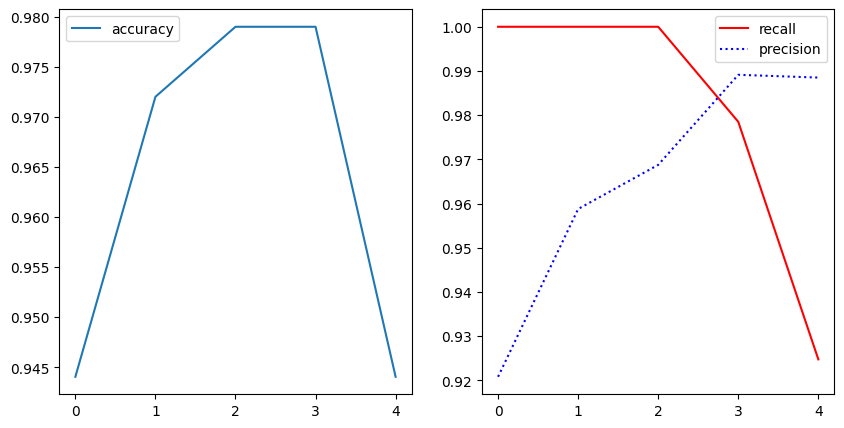

In [51]:
acc_scores = [score[0] for score in scores]
rec_scores = [score[1] for score in scores]
pre_scores = [score[2] for score in scores]
fig,axs = plt.subplots(ncols=2,figsize=(10,5))
axs[0].plot(acc_scores,label='accuracy')
axs[0].legend()
axs[1].plot(rec_scores,'r',label='recall')
axs[1].plot(pre_scores,'b:',label='precision')
axs[1].legend()
plt.show()